# Import necessary libraries


In [79]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  


# Load the dataset


In [80]:
data = pd.read_csv("employees_dataset.csv")
print(data.head())


   employee_id         department     region  education gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met_more_than_80  awards_won  avg_training_score  
0                  1                      1           0                  77  
1                  5            

In [81]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

# Defining target variable

In [82]:
# Strip extra spaces from column names
data.columns = data.columns.str.strip()


data['Target'] = (data['KPIs_met_more_than_80'] > 0).astype(int)

data.drop(['employee_id','KPIs_met_more_than_80'], axis=1, inplace=True)


# Encode Categorical Features

In [83]:
columns_to_encode = ['gender', 'department', 'education', 'recruitment_channel','region']
existing_columns = [col for col in columns_to_encode if col in data.columns]
data = pd.get_dummies(data, columns=existing_columns, drop_first=True)


# Handling missing values

In [84]:

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns


data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()), axis=0)


data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]), axis=0)


print(data.isnull().sum())


no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
Target                          0
gender_m                        0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Masters & above       0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_

# train test split the data

In [85]:

X = data.drop(['Target'], axis=1)
y = data['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the model

In [86]:

model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Making predictions

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the label mapping
label_mapping = {0: "Not Hired", 1: "Hired"}

# Make predictions on the test set
y_pred = model.predict(X_test)


# Map predictions and true labels to "Hired" and "Not Hired"
y_test_mapped = [label_mapping[label] for label in y_test]
y_pred_mapped = [label_mapping[label] for label in y_pred]

print(y_pred_mapped)


['Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Hired', 'Hired', 'Not Hired', 'Not Hired', 'Hired', 'Not Hired', 'Not Hired', 'Not Hire

#  Evaluate the model

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

   Not Hired       0.60      0.41      0.49      1231
       Hired       0.73      0.85      0.78      2253

    accuracy                           0.70      3484
   macro avg       0.67      0.63      0.64      3484
weighted avg       0.68      0.70      0.68      3484



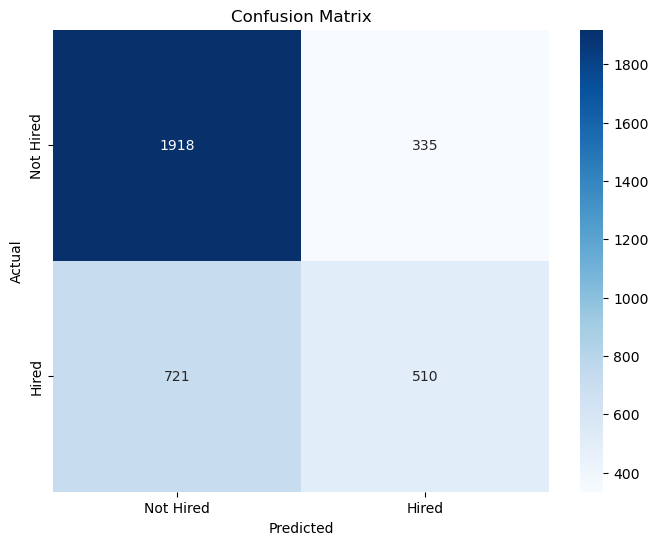

In [88]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_mapped, y_pred_mapped, target_names=["Not Hired", "Hired"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped, labels=["Not Hired", "Hired"])

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Hired", "Hired"], yticklabels=["Not Hired", "Hired"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()